In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings(action='ignore')

In [2]:
test_data = pd.read_csv("./rossmann-store-sales-data/test.csv")
train_data = pd.read_csv("./rossmann-store-sales-data/train.csv")
store_data = pd.read_csv("./rossmann-store-sales-data/store.csv")

### EDA

In [3]:
test_data.shape

(41088, 8)

In [4]:
train_data.shape

(1017209, 9)

In [5]:
store_data.shape

(1115, 10)

In [6]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
# close 일때 판매량이 있는 데이터 존재 여부
train_data[(train_data.Open == 0) & (train_data.Sales > 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [33]:
# open 일때 판매량이 0인 데이터 존재 여부
train_data[(train_data.Open == 1) & (train_data.Sales == 0)].shape

(54, 9)

In [71]:
train_data['Date'].isna().sum()

0

In [72]:
train_data['Month'] = pd.to_datetime(train_data['Date']).dt.month

In [73]:
train_data['Year'] = pd.to_datetime(train_data['Date']).dt.year

<AxesSubplot: xlabel='Year'>

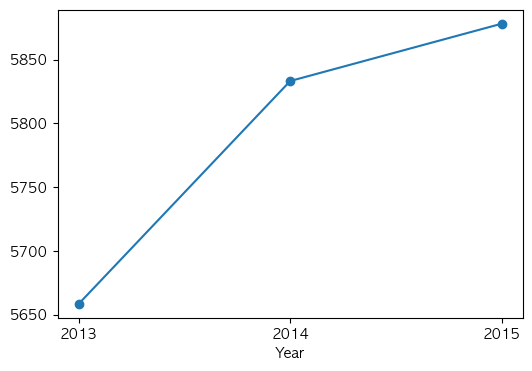

In [103]:
monthly_sales = train_data.groupby('Year')["Sales"].mean()
fig = plt.figure(figsize=(6,4))
plt.xticks(monthly_sales.index)
monthly_sales.plot(marker='o')

<AxesSubplot: xlabel='Month'>

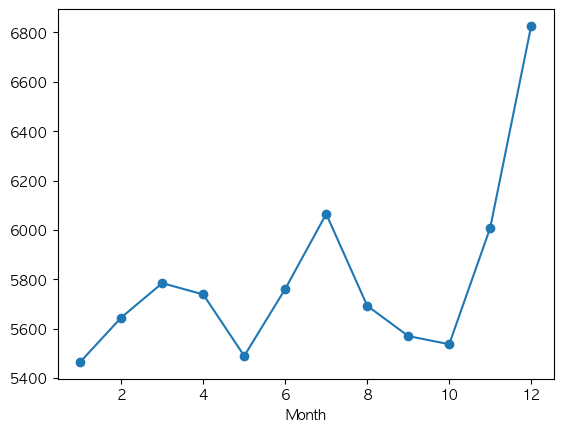

In [79]:
monthly_sales = train_data.groupby('Month')["Sales"].mean()
monthly_sales.plot(marker='o')

### 12월에 높은 이유?
- 가설1: 프로모션 확인
- 가설2: 